## Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


## Data upload

In [33]:
train_df = pd.read_csv("../data/ml_ozon_—Åounterfeit_train.csv")

train_df['item_time_alive_log'] = np.log1p(train_df['item_time_alive'])  # log(1 + x)

## Data analysis

–ü—Ä–æ–ø—É—Å–∫–∏

In [43]:
mv = train_df.isna().sum().sort_values(ascending=False)
mv = mv[mv > 0]
miss = pd.DataFrame({'missing': mv, 'missing_%': (mv / len(train_df) * 100).round(2)})
display(miss.head(30))


missing  missing_%
comments_published_count       150005      76.07
rating_5_count                 150005      76.07
rating_4_count                 150005      76.07
rating_3_count                 150005      76.07
rating_2_count                 150005      76.07
rating_1_count                 150005      76.07
photos_published_count         150005      76.07
videos_published_count         150005      76.07
brand_name                      80531      40.84
description                     26060      13.22
OrderAcceptedCountTotal7        10401       5.27
GmvTotal7                       10191       5.17
ExemplarAcceptedCountTotal7     10191       5.17
ExemplarReturnedCountTotal7     10191       5.17
ExemplarReturnedValueTotal7     10191       5.17
OrderAcceptedCountTotal30        8160       4.14
ExemplarAcceptedCountTotal30     7930       4.02
GmvTotal30                       7930       4.02
ExemplarReturnedValueTotal30     7930       4.02
ExemplarReturnedCountTotal30     7930       4.02
OrderAcceptedCountTotal90        7517       3.81
ExemplarAcceptedCountTotal90     7407       3.76
GmvTotal90                       7407       3.76
ExemplarReturnedCountTotal90     7407       3.76
ExemplarReturnedValueTotal90     7407       3.76
ItemVarietyCount                  997       0.51
ItemAvailableCount                997       0.51

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤

C:\Users\Kostya\AppData\Local\Temp\ipykernel_12840\1091904863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="resolution", data=train_df, palette="Set2")


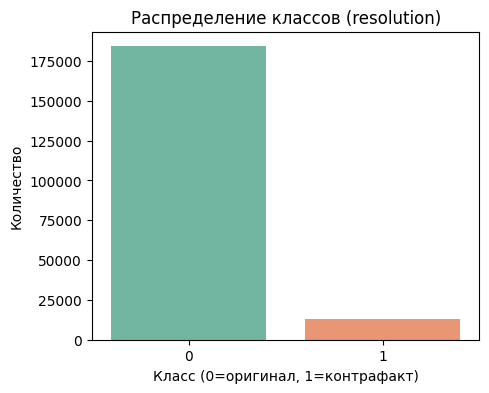

resolution
0    0.933813
1    0.066187
Name: proportion, dtype: float64


In [34]:
plt.figure(figsize=(5,4))
sns.countplot(x="resolution", data=train_df, palette="Set2")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ (resolution)")
plt.xlabel("–ö–ª–∞—Å—Å (0=–æ—Ä–∏–≥–∏–Ω–∞–ª, 1=–∫–æ–Ω—Ç—Ä–∞—Ñ–∞–∫—Ç)")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
plt.show()

print(train_df["resolution"].value_counts(normalize=True))

–†–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã –≤ –æ–ø–∏—Å–∞–Ω–∏–∏ –∏ –Ω–∞–∑–≤–∞–Ω–∏–∏


=== DESCRIPTION | resolution=0 ===
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ (—Å–ª–æ–≤): 43.0
–ú–µ–¥–∏–∞–Ω–∞: 45
90-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 81

=== DESCRIPTION | resolution=1 ===
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ (—Å–ª–æ–≤): 49.8
–ú–µ–¥–∏–∞–Ω–∞: 67
90-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 80


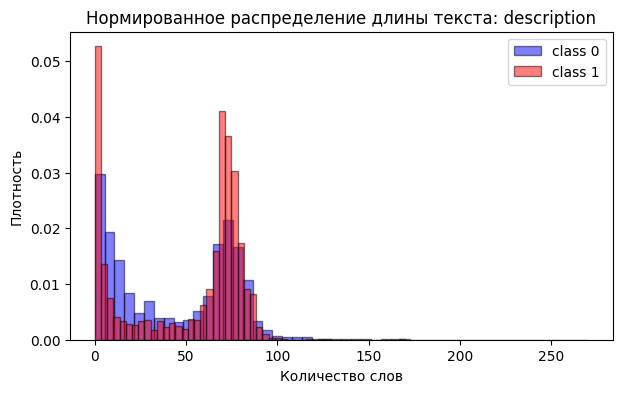


=== NAME_RUS | resolution=0 ===
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ (—Å–ª–æ–≤): 10.1
–ú–µ–¥–∏–∞–Ω–∞: 9
90-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 16

=== NAME_RUS | resolution=1 ===
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ (—Å–ª–æ–≤): 8.0
–ú–µ–¥–∏–∞–Ω–∞: 7
90-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 14


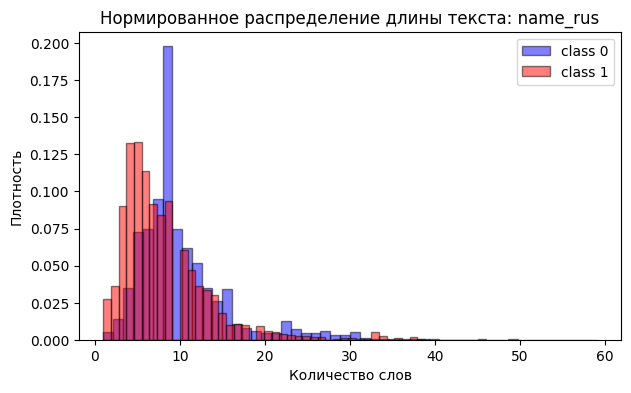

In [35]:
import numpy as np
import matplotlib.pyplot as plt

for col in ["description", "name_rus"]:
    plt.figure(figsize=(7,4))
    for cls, color in zip([0, 1], ["blue", "red"]):
        subset = train_df[train_df["resolution"] == cls][col].fillna("")
        lengths = subset.apply(lambda x: len(str(x).split()))
        
        print(f"\n=== {col.upper()} | resolution={cls} ===")
        print(f"–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ (—Å–ª–æ–≤): {lengths.mean():.1f}")
        print(f"–ú–µ–¥–∏–∞–Ω–∞: {lengths.median():.0f}")
        print(f"90-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: {np.percentile(lengths, 90):.0f}")
        
        plt.hist(lengths, bins=50, density=True, alpha=0.5,
                 label=f"class {cls}", color=color, edgecolor="black")
    
    plt.title(f"–ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞: {col}")
    plt.xlabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤")
    plt.ylabel("–ü–ª–æ—Ç–Ω–æ—Å—Ç—å")
    plt.legend()
    plt.show()


TOP-—Å–ª–æ–≤–∞ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

def top_words_for_class(texts, labels, target_class, n=15):
    vect = CountVectorizer(max_features=20000)
    X = vect.fit_transform(texts.fillna(""))
    y = labels.values  
    idx = (y == target_class)
    word_counts = np.array(X[idx].sum(axis=0)).flatten()
    vocab = np.array(vect.get_feature_names_out())
    top_idx = word_counts.argsort()[::-1][:n]
    return list(zip(vocab[top_idx], word_counts[top_idx]))

for cls in [0, 1]:
    print(f"\nüîπ –¢–æ–ø-—Å–ª–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ {cls}:")
    for w, c in top_words_for_class(train_df["description"], train_df["resolution"], cls):
        print(f"{w}: {c}")



üîπ –¢–æ–ø-—Å–ª–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ 0:
br: 516674
–¥–ª—è: 206532
samsung: 134297
li: 111806
–Ω–∞: 76464
–Ω–µ: 44953
–æ—Ç: 39796
—á—Ç–æ: 30956
–ø—Ä–∏: 30486
–∏–∑: 29647
–º–º: 27726
philips: 27604
xiaomi: 26156
np: 24669
–ø–æ–¥—Ö–æ–¥–∏—Ç: 24390

üîπ –¢–æ–ø-—Å–ª–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ 1:
br: 28153
–¥–ª—è: 12489
li: 6542
–Ω–∞: 6443
–Ω–µ: 3149
–æ—Ç: 3011
—á—Ç–æ: 2939
–Ω–∞—É—à–Ω–∏–∫–∏: 2939
–≤—ã: 2857
–±–ª–∞–≥–æ–¥–∞—Ä—è: 2733
–∏–ª–∏: 2613
–æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç: 2607
—ç—Ç–æ: 2601
–¥–æ: 2233
–ø–æ–∑–≤–æ–ª—è–µ—Ç: 2155


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å —Ç–∞–≥—Ä–µ—Ç–æ–º

C:\Users\Kostya\AppData\Local\Temp\ipykernel_12840\3460169805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


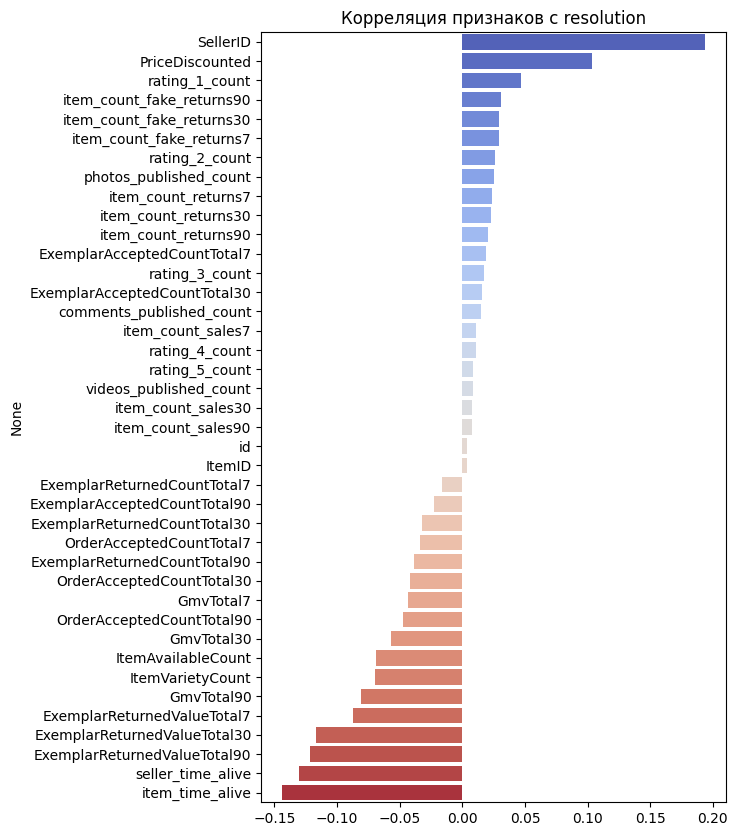

In [84]:
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
corr = train_df[num_cols].corrwith(train_df["resolution"]).sort_values(ascending=False)
corr = corr.drop("resolution")
plt.figure(figsize=(6,10))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å resolution")
plt.show()


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ TOP-10 —Ñ–∏—á –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å —Ç–∞—Ä–≥–µ—Ç–æ–º(–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ - –∫–æ–Ω—Ç—Ä–∏—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤)

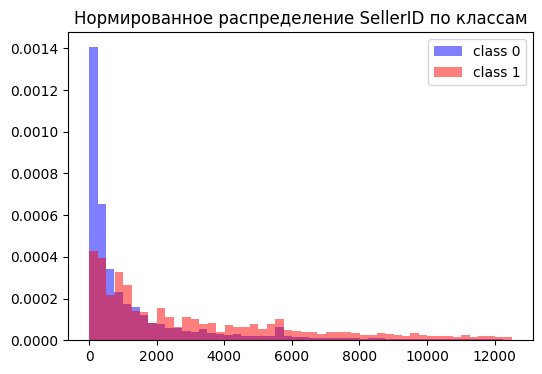

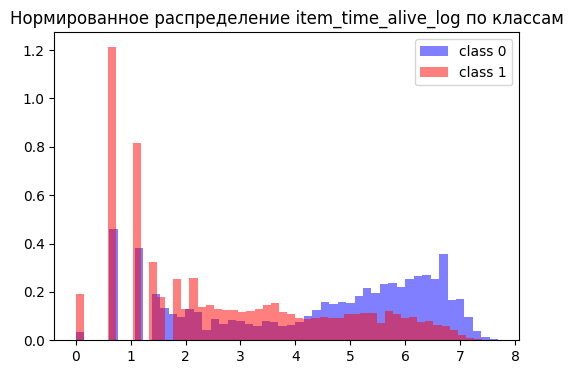

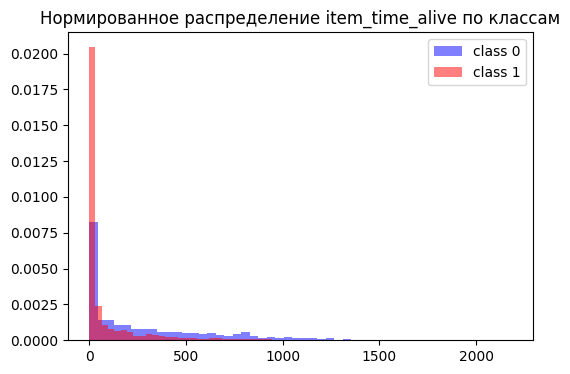

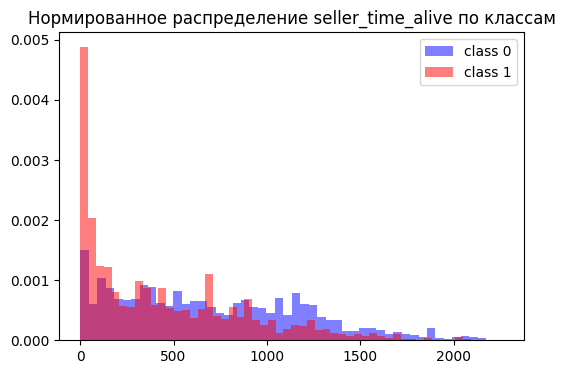

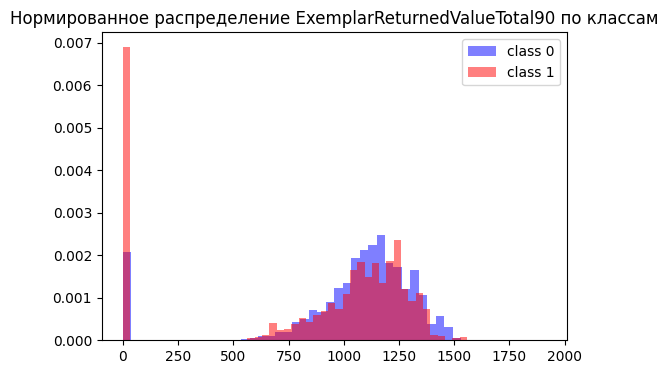

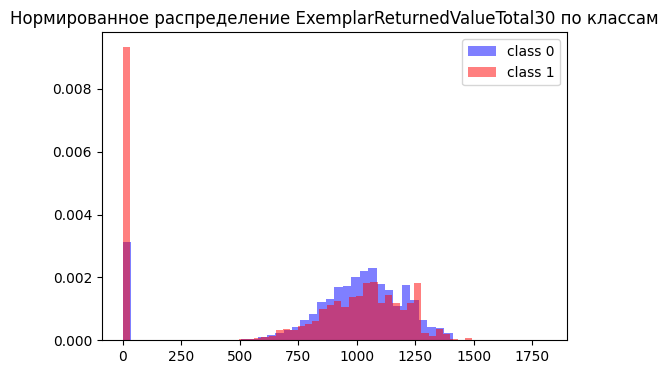

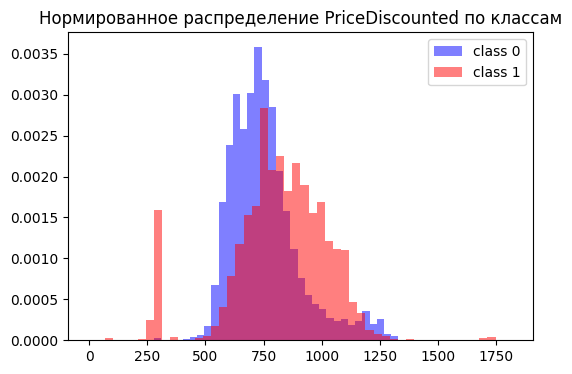

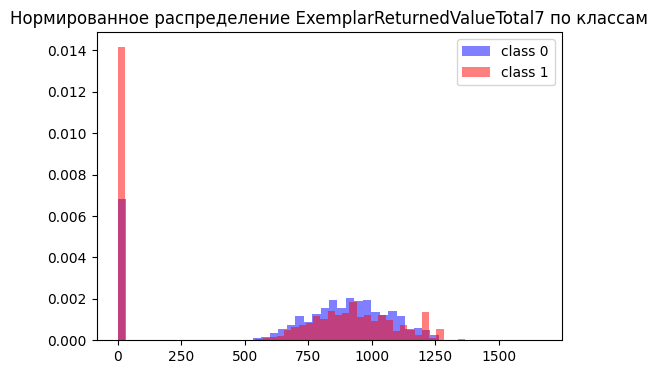

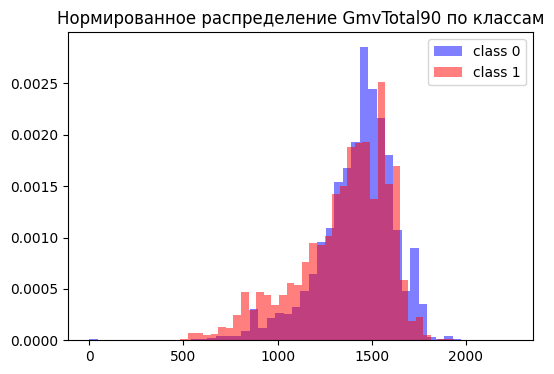

In [38]:
top_feats = corr.abs().sort_values(ascending=False).head(10).index.drop("resolution")

for col in top_feats:
    plt.figure(figsize=(6,4))
    for cls, color in zip([0,1], ["blue","red"]):
        plt.hist(train_df[train_df["resolution"]==cls][col], 
                 bins=50, density=True, alpha=0.5, color=color, label=f"class {cls}")
    plt.title(f"–ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col} –ø–æ –∫–ª–∞—Å—Å–∞–º")
    plt.legend()
    plt.show()


In [39]:
print("–ü—Ä–æ–ø—É—Å–∫–∏ –≤ brand_name –ø–æ –∫–ª–∞—Å—Å–∞–º:")
print(train_df.groupby("resolution")["brand_name"].apply(lambda x: x.isna().mean()))

print("\n–¢–æ–ø-10 –±—Ä–µ–Ω–¥–æ–≤ –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É:")
for cls in [0,1]:
    top_brands = (train_df[train_df["resolution"]==cls]["brand_name"]
                  .value_counts()
                  .head(10))
    print(f"\n–ö–ª–∞—Å—Å {cls}:")
    print(top_brands)

–ü—Ä–æ–ø—É—Å–∫–∏ –≤ brand_name –ø–æ –∫–ª–∞—Å—Å–∞–º:
resolution
0    0.394611
1    0.602590
Name: brand_name, dtype: float64

–¢–æ–ø-10 –±—Ä–µ–Ω–¥–æ–≤ –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É:

–ö–ª–∞—Å—Å 0:
brand_name
iQZiP            6060
ProFDetali       4808
OEM              4236
Levsha kaluga    2994
HUAYU            2743
OINO             2739
Sony             2453
HotComputers     2391
Cameron Sino     2055
MyPads           1955
Name: count, dtype: int64

–ö–ª–∞—Å—Å 1:
brand_name
Sony                600
Mivis               436
Logitech G          299
Pioneer             167
Philips Sonicare    131
Redmi               124
Kingston Fury       121
Art-Gsm              97
Mijia                85
LISIK.               82
Name: count, dtype: int64


–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ item_time_alive: 0


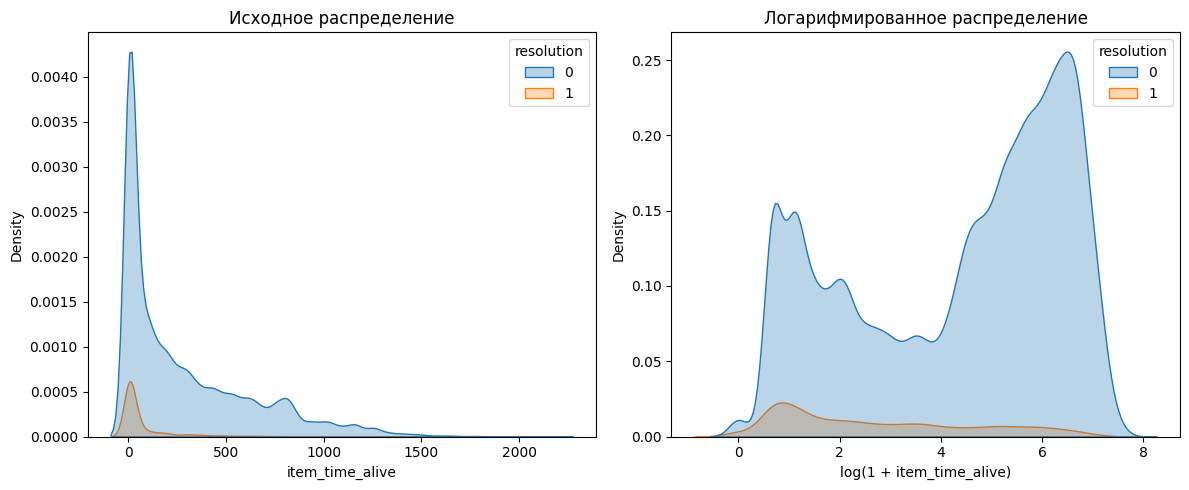

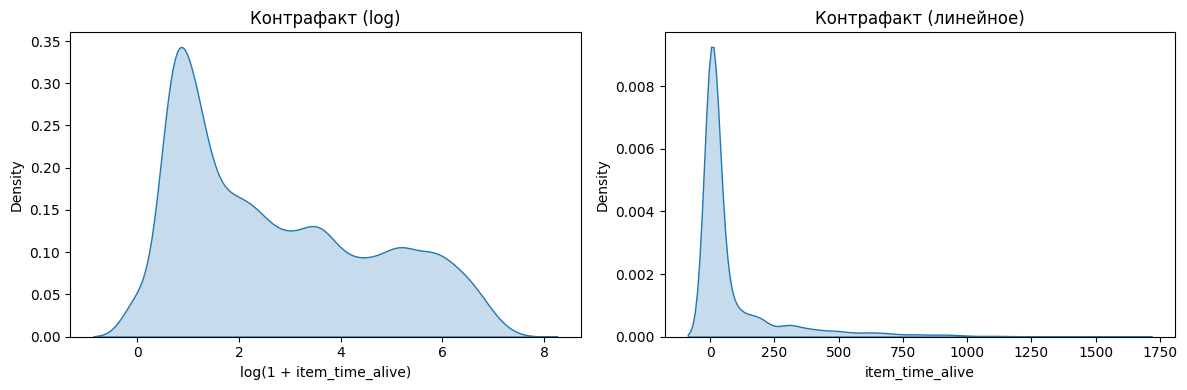

In [40]:
print("–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ item_time_alive:", train_df['item_time_alive'].min())

train_df['item_time_alive_log'] = np.log1p(train_df['item_time_alive'])  # log(1 + x)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=train_df, x='item_time_alive', hue='resolution', fill=True, alpha=0.3)
plt.title('–ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
plt.xlabel('item_time_alive')

plt.subplot(1, 2, 2)
sns.kdeplot(data=train_df, x='item_time_alive_log', hue='resolution', fill=True, alpha=0.3)
plt.title('–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
plt.xlabel('log(1 + item_time_alive)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(data=train_df[train_df['resolution'] == 1], x='item_time_alive_log', fill=True)
plt.title('–ö–æ–Ω—Ç—Ä–∞—Ñ–∞–∫—Ç (log)')
plt.xlabel('log(1 + item_time_alive)')

plt.subplot(1, 2, 2)
sns.kdeplot(data=train_df[train_df['resolution'] == 1], x='item_time_alive', fill=True)
plt.title('–ö–æ–Ω—Ç—Ä–∞—Ñ–∞–∫—Ç (–ª–∏–Ω–µ–π–Ω–æ–µ)')
plt.xlabel('item_time_alive')

plt.tight_layout()
plt.show()

## Images analysis


ID 97026
–ù–∞–∑–≤–∞–Ω–∏–µ: –°–∏—Å—Ç–µ–º–Ω—ã–π –±–ª–æ–∫ (Intel Core i5-10400F, RAM 32 –ì–ë, SSD 120 –ì–ë, AMD Radeon RX 580 (8 –ì–±), Windows 10 Pro), –±–µ–ª—ã–π
–û–ø–∏—Å–∞–Ω–∏–µ: –°–∏—Å—Ç–µ–º–Ω—ã–π –±–ª–æ–∫ –¥–ª—è –¥–æ–º–∞ –∏ –æ—Ñ–∏—Å–∞.
–°–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–µ –∏ –Ω–∞–¥—ë–∂–Ω—ã–µ –∫–æ–º–ø–ª–µ–∫—Ç—É—é—â–∏–µ –≤ —Å–æ–≤–æ–∫—É–ø–µ —Å –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∏ –±–µ—Ä–µ–∂–Ω–æ–π —Å–±–æ—Ä–∫–æ–π –æ–±–µ—Å–ø–µ—á–∞—Ç –í–∞–º —Å—Ç–∞–±–∏–ª—å–Ω—É—é –±—ã—Å—Ç—Ä—É—é —Ä–∞–±–æ—Ç—É –Ω–∞ –¥–æ–ª–≥–æ–µ –≤—Ä–µ–º—è. 
–ü—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–∞—è —Å–±–æ—Ä–∫–∞ –ø–æ–∑–≤–æ–ª–∏—Ç –∑–∞–∫—Ä—ã—Ç—å –≤—Å–µ –µ–∂–µ–¥–Ω–µ–≤–Ω—ã–µ –ø–æ—Ç—Ä–µ–±–Ω–æ—Å—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –æ—Ç –æ—Ñ–∏—Å–Ω—ã—Ö –ø—Ä–æ–≥—Ä–∞–º–º –∏ –≤–µ–±-—Å—ë—Ä—Ñ–∏–Ω–≥–∞ –¥–æ –ª—ë–≥–∫–∏—Ö –∏ –Ω–µ—Ç—Ä–µ–±–æ–≤–∞—Ç–µ–ª—å–Ω—ã—Ö –∏–≥—Ä, –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –≤–∏–¥–µ–æ-–∫–æ–Ω—Ç–µ–Ω—Ç–∞ –≤ —Ö–æ—Ä–æ—à–µ–º –∫–∞—á–µ—Å—Ç–≤–µ.
–í–º–µ—Å—Ç–µ —Å —ç—Ç–∏–º –í—ã –ø–æ–ª—É—á–∞–µ—Ç–µ —É–∂–µ –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—É—é –ª–∏—Ü–µ–Ω–∑–∏–æ–Ω–Ω—É—é –æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω—É—é —Å–∏—Å—Ç–

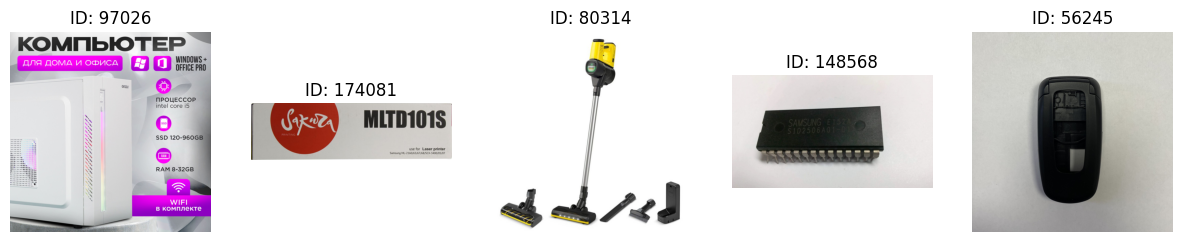

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

test_df = pd.read_csv("../data/ml_ozon_—Åounterfeit_test.csv")

test_img_folder = "C:/Users/Kostya/Desktop/CodeNRockHack/CounterfeitDetector/data/ml_ozon_—Åounterfeit_test_images"

sample = test_df.dropna(subset=["description"]).sample(5, random_state=42)

plt.figure(figsize=(15,10))
for i, row in enumerate(sample.itertuples(), 1):
    img_path = os.path.join(img_folder, f"{row.ItemID}.png")
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(1, 5, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"ID: {row.ItemID}")
        print(f"ID {row.ItemID}\n"
              f"–ù–∞–∑–≤–∞–Ω–∏–µ: {row.name_rus}\n"
              f"–û–ø–∏—Å–∞–Ω–∏–µ: {row.description}...\n")

plt.show()

ID 16354 | res=0
–ù–∞–∑–≤–∞–Ω–∏–µ: –ê–∫–∫—É–º—É–ª—è—Ç–æ—Ä iPhone 6 -1810 mAh - Pisen (Apple )
–û–ø–∏—Å–∞–Ω–∏–µ: –ê–∫–∫—É–º—É–ª—è—Ç–æ—Ä Pisen –¥–ª—è iPhone 6 (Apple) -1810 mAh –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é –∏ –Ω–∞–¥–µ–∂–Ω—É—é –∑–∞–ø—á–∞—Å—Ç—å –¥–ª—è –≤–∞—à–µ–≥–æ –º–æ–±–∏–ª—å–Ω–æ–≥–æ —Ç–µ–ª–µ—Ñ–æ–Ω–∞. –û–Ω –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ–µ –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã –∏ —Å—Ç–∞–±–∏–ª—å–Ω–æ–µ –ø–∏—Ç–∞–Ω–∏–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞, –±–ª–∞–≥–æ–¥–∞—Ä—è –ø–æ–≤—ã—à–µ–Ω–Ω–æ–π –µ–º–∫–æ—Å—Ç–∏ –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–∞ –≤ 1810 mAh –∏ —É—Å–∏–ª–µ–Ω–Ω–æ–π –∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–∞.

–°–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç—å –∏ –µ–º–∫–æ—Å—Ç—å: –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –¥–ª—è Apple iPhone 6, –∞ —Ç–∞–∫–∂–µ iPod/iPhone.

–°—Ç–∏–ª—å–Ω—ã–π —á–µ—Ä–Ω—ã–π —Ü–≤–µ—Ç –∞–∫–∫—É–º—É–ª—è—Ç–æ—Ä–∞ –≥–∞—Ä–º–æ–Ω–∏—á–Ω–æ —Å–æ—á–µ—Ç–∞–µ—Ç—Å—è —Å –¥–∏–∑–∞–π–Ω–æ–º –≤–∞—à–µ–≥–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞, –Ω–µ –≤—ã–¥–µ–ª—è—è –µ–≥–æ –Ω–∞ –æ–

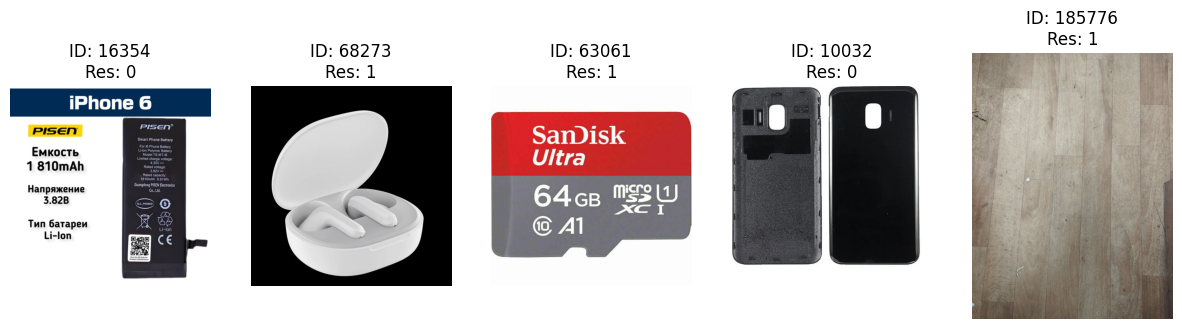

In [82]:
train_df = pd.read_csv("../data/ml_ozon_—Åounterfeit_train.csv")

sample = train_df.dropna(subset=["description"]).sample(5, random_state=47)
train_img_folder = "C:/Users/Kostya/Desktop/CodeNRockHack/CounterfeitDetector/data/ml_ozon_—Åounterfeit_train_images"

plt.figure(figsize=(15,10))
for i, row in enumerate(sample.itertuples(), 1):
    img_path = os.path.join(train_img_folder, f"{row.ItemID}.png")
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(1, 5, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"ID: {row.ItemID}\nRes: {row.resolution}")
        print(f"ID {row.ItemID} | res={row.resolution}\n"
              f"–ù–∞–∑–≤–∞–Ω–∏–µ: {row.name_rus}\n"
              f"–û–ø–∏—Å–∞–Ω–∏–µ: {row.description}\n"
              f"–¶–µ–Ω–∞: {row.PriceDiscounted}\n")
plt.show()


In [88]:
from pathlib import Path
import re
import pandas as pd

train_csv = "../data/ml_ozon_—Åounterfeit_train.csv"
img_folder = Path(r"C:/Users/Kostya/Desktop/CodeNRockHack/CounterfeitDetector/data/ml_ozon_—Åounterfeit_train_images")

train = pd.read_csv(train_csv, nrows=10000)
train['ItemID_str'] = train['ItemID'].astype(str)

# —Å–æ–±—Ä–∞—Ç—å —Å–ø–∏—Å–æ–∫ —Ñ–∞–π–ª–æ–≤ –∏ –º–∞–ø–ø–∏–Ω–≥ –ø–æ stem –∏ –ø–æ –ø–µ—Ä–≤–æ–π –≤—Å—Ç—Ä–µ—á–µ–Ω–Ω–æ–π —Ü–∏—Ñ—Ä–µ (ItemID)
files = [p for p in img_folder.rglob("*") if p.is_file()]
stem_map = {p.stem: str(p) for p in files}

num_map = {}
for p in files:
    m = re.search(r'(\d{4,})', p.stem)
    if m:
        key = m.group(1)
        if key not in num_map:
            num_map[key] = str(p)

print("Found files:", len(files))
# —Ñ—É–Ω–∫—Ü–∏—è –ø–æ–∏—Å–∫–∞ (–∏—Å–ø–æ–ª—å–∑—É–π –¥–∞–ª–µ–µ)
def find_image(itemid_str):
    if itemid_str in stem_map:
        return stem_map[itemid_str]
    if itemid_str in num_map:
        return num_map[itemid_str]
    # fallback: find any stem containing the id (slow)
    for s,p in stem_map.items():
        if itemid_str in s:
            return p
    return None


Found files: 196460


Matched: 9972
class 0 ‚Äî mean: 1093.0, median: 900.0, count: 9667
class 1 ‚Äî mean: 1193.5, median: 1000.0, count: 305


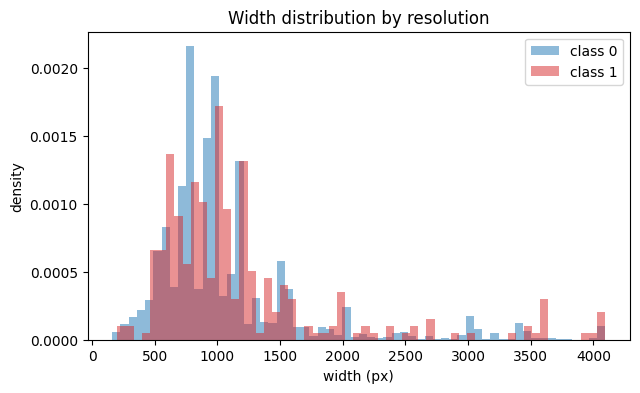

In [89]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

widths = []
ids = []
paths = []
for iid in train['ItemID_str'].unique():
    p = find_image(iid)
    if p is None: 
        continue
    try:
        with Image.open(p) as im:
            w,h = im.size
    except Exception:
        continue
    widths.append(w)
    ids.append(iid)
    paths.append(p)

df_w = pd.DataFrame({"ItemID_str": ids, "width": widths, "img_path": paths})
merged = train.merge(df_w, on="ItemID_str", how="inner")
print("Matched:", len(merged))

for cls in [0,1]:
    s = merged[merged['resolution']==cls]['width'].dropna()
    print(f"class {cls} ‚Äî mean: {s.mean():.1f}, median: {s.median():.1f}, count: {len(s)}")

# plot (normalized)
plt.figure(figsize=(7,4))
for cls,color in zip([0,1], ['C0','C3']):
    s = merged[merged['resolution']==cls]['width'].dropna()
    if len(s)>0:
        plt.hist(s, bins=60, density=True, alpha=0.5, label=f'class {cls}', color=color)
plt.xlabel('width (px)')
plt.ylabel('density')
plt.title('Width distribution by resolution')
plt.legend()
plt.show()


Matched: 9972
class 0 ‚Äî mean: 1161.7, median: 1000.0, count: 9667
class 1 ‚Äî mean: 1193.1, median: 1000.0, count: 305


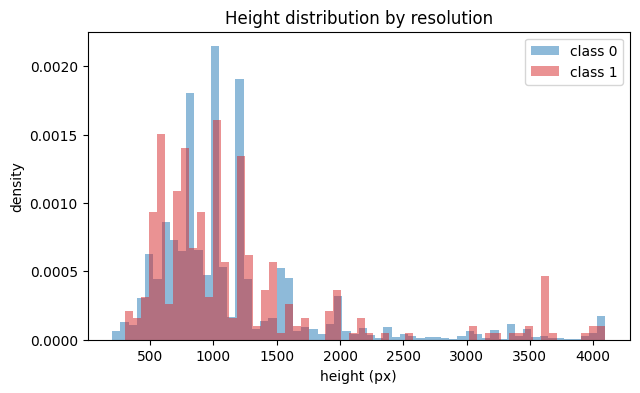

In [90]:
from PIL import Image
import matplotlib.pyplot as plt

heights = []
ids = []
for iid in train['ItemID_str'].unique():
    p = find_image(iid)
    if p is None: 
        continue
    try:
        with Image.open(p) as im:
            w,h = im.size
    except Exception:
        continue
    heights.append(h)
    ids.append(iid)

df_h = pd.DataFrame({"ItemID_str": ids, "height": heights})
merged_h = train.merge(df_h, on="ItemID_str", how="inner")
print("Matched:", len(merged_h))

for cls in [0,1]:
    s = merged_h[merged_h['resolution']==cls]['height'].dropna()
    print(f"class {cls} ‚Äî mean: {s.mean():.1f}, median: {s.median():.1f}, count: {len(s)}")

plt.figure(figsize=(7,4))
for cls,color in zip([0,1], ['C0','C3']):
    s = merged_h[merged_h['resolution']==cls]['height'].dropna()
    if len(s)>0:
        plt.hist(s, bins=60, density=True, alpha=0.5, label=f'class {cls}', color=color)
plt.xlabel('height (px)')
plt.ylabel('density')
plt.title('Height distribution by resolution')
plt.legend()
plt.show()


In [93]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 660.6 kB/s eta 0:00:03
   - -------------------------------------- 0.0/1.5 MB 393.8 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.5 MB 819.2 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 1.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.5 MB 1.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 2.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 2.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.5 MB 2.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.5 MB 2.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.5 MB 2.8 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd, numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy import sparse
import lightgbm as lgb

TRAIN_CSV = "../data/ml_ozon_—Åounterfeit_train.csv"
TEXT_COLS = ["name_rus", "description"]
CAT_COLS = ["brand_name", "CommercialTypeName4"]   
TARGET = "resolution"
ID_COL = "id"   

N_FOLDS = 5
RANDOM_STATE = 42

df = pd.read_csv(TRAIN_CSV)

df[TARGET] = df[TARGET].astype(int)

exclude = {ID_COL, "ItemID", "SellerID", TARGET}
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in exclude]
cat_cols = [c for c in CAT_COLS if c in df.columns]

print("Numeric cols:", num_cols)
print("Cat cols:", cat_cols)
print("Text cols:", [c for c in TEXT_COLS if c in df.columns])

for c in cat_cols:
    counts = df[c].fillna("##NA##").value_counts(dropna=False).to_dict()
    df[c + "_freq"] = df[c].fillna("##NA##").map(counts).astype(float)
cat_freq_cols = [c + "_freq" for c in cat_cols]

X_num = df[num_cols].copy()
imp = SimpleImputer(strategy="median")
X_num_imp = imp.fit_transform(X_num)          
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num_imp)

texts = []
for i, row in df.iterrows():
    pieces = []
    for c in TEXT_COLS:
        if c in df.columns:
            pieces.append(str(row.get(c, "")) if pd.notna(row.get(c, "")) else "")
    texts.append(" ".join(pieces))
tf = TfidfVectorizer(max_features=80_000, ngram_range=(1,2))
X_text = tf.fit_transform(texts) 

if cat_freq_cols:
    X_catfreq = df[cat_freq_cols].fillna(0).values
else:
    X_catfreq = np.zeros((len(df), 0))

X_num_sparse = sparse.csr_matrix(X_num_scaled)
X_cat_sparse = sparse.csr_matrix(X_catfreq)
X = sparse.hstack([X_text, X_cat_sparse, X_num_sparse], format="csr")
y = df[TARGET].values

print("Feature matrix shape:", X.shape)

skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
oof = np.zeros(len(df))
fold_scores = []

for fold, (tr_idx, va_idx) in enumerate(skf.split(X, y), 1):
    X_tr, X_va = X[tr_idx], X[va_idx]
    y_tr, y_va = y[tr_idx], y[va_idx]

    clf = lgb.LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.05,
        num_leaves=31,
        n_jobs=-1,
        random_state=RANDOM_STATE,
        class_weight='balanced'   # handle imbalance
    )
    clf.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric='binary_logloss'
    )

    pval = clf.predict_proba(X_va)[:,1]
    ths = np.linspace(0.01, 0.99, 99)
    best_th, best_f1 = 0.5, 0.0
    for t in ths:
        f = f1_score(y_va, (pval >= t).astype(int))
        if f > best_f1:
            best_f1 = f
            best_th = t

    oof[va_idx] = (pval >= best_th).astype(int)
    f1_fold = f1_score(y_va, oof[va_idx])
    fold_scores.append(f1_fold)
    print(f"Fold {fold} -> best_th={best_th:.3f} | val F1={f1_fold:.4f}")

print("CV folds F1:", fold_scores)
print("OOF F1:", f1_score(y, oof))


Numeric cols: ['rating_1_count', 'rating_2_count', 'rating_3_count', 'rating_4_count', 'rating_5_count', 'comments_published_count', 'photos_published_count', 'videos_published_count', 'PriceDiscounted', 'item_time_alive', 'item_count_fake_returns7', 'item_count_fake_returns30', 'item_count_fake_returns90', 'item_count_sales7', 'item_count_sales30', 'item_count_sales90', 'item_count_returns7', 'item_count_returns30', 'item_count_returns90', 'GmvTotal7', 'GmvTotal30', 'GmvTotal90', 'ExemplarAcceptedCountTotal7', 'ExemplarAcceptedCountTotal30', 'ExemplarAcceptedCountTotal90', 'OrderAcceptedCountTotal7', 'OrderAcceptedCountTotal30', 'OrderAcceptedCountTotal90', 'ExemplarReturnedCountTotal7', 'ExemplarReturnedCountTotal30', 'ExemplarReturnedCountTotal90', 'ExemplarReturnedValueTotal7', 'ExemplarReturnedValueTotal30', 'ExemplarReturnedValueTotal90', 'ItemVarietyCount', 'ItemAvailableCount', 'seller_time_alive']
Cat cols: ['brand_name', 'CommercialTypeName4']
Text cols: ['name_rus', 'descrip

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 1 -> best_th=0.660 | val F1=0.8150
[LightGBM] [Info] Number of positive: 10441, number of negative: 147317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 49.269768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2256785
[LightGBM] [Info] Number of data points in the train set: 157758, number of used features: 69755
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2 -> best_th=0.630 | val F1=0.8247
[LightGBM] [Info] Number of positive: 10441, number of negative: 147317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 42.790329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2255220
[LightGBM] [Info] Number of data points in the train set: 157758, number of used features: 69699
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3 -> best_th=0.700 | val F1=0.8183
[LightGBM] [Info] Number of positive: 10442, number of negative: 147317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 42.772599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2255345
[LightGBM] [Info] Number of data points in the train set: 157759, number of used features: 69590
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 4 -> best_th=0.760 | val F1=0.8233
[LightGBM] [Info] Number of positive: 10442, number of negative: 147317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 43.787857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2250354
[LightGBM] [Info] Number of data points in the train set: 157759, number of used features: 69632
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 5 -> best_th=0.760 | val F1=0.8236
CV folds F1: [0.8150203477617463, 0.8247041420118343, 0.8182861514919664, 0.8233236151603499, 0.823552049259188]
OOF F1: 0.820952092177077


OSError: Cannot save file into a non-existent directory: 'out'

In [96]:

# ---------- Save OOF and vectorizer/scaler for inference ----------
df_oof = df[[ID_COL]].copy() if ID_COL in df.columns else df.reset_index()[["index"]].rename(columns={"index":"id"})
df_oof["oof_pred"] = oof.astype(int)
df_oof[TARGET] = y
df_oof.to_csv("../out/oof_baseline_text_tabular.csv", index=False)
print("Saved out/oof_baseline_text_tabular.csv")


Saved out/oof_baseline_text_tabular.csv


In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_true, oof_preds, oof_probs —É —Ç–µ–±—è —É–∂–µ –µ—Å—Ç—å –ø–æ—Å–ª–µ CV
# (oof_probs ‚Äì –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, oof_preds ‚Äì –±–∏–Ω–∞—Ä–Ω—ã–µ –º–µ—Ç–∫–∏ —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º threshold)

print("OOF Precision:", precision_score(y, oof_preds))
print("OOF Recall:", recall_score(y, oof_preds))
print("OOF F1:", f1_score(y, oof_preds))

# Confusion matrix
cm = confusion_matrix(y, oof_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["–û—Ä–∏–≥–∏–Ω–∞–ª", "–ö–æ–Ω—Ç—Ä–∞—Ñ–∞–∫—Ç"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (OOF)")
plt.show()


NameError: name 'oof_preds' is not defined